### STATISTICAL DATA ANALYSIS

RESEARCH QUESTION:
- IS AGE AND BMI A SIGNIFICANT CONTRIBUTOR TO INSURANCE CHARGES.
- IS REGION AND SMOKING HABIT ASSOCIATED?
- IS AGE AND SMOKING HABIT ASSOCIATED?

In [2]:
import numpy as np 
import pandas as pd 


import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats 

In [4]:
# load data set

insurance_df = pd.read_csv('insurance.csv')

In [5]:
# inspect the head
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### STEP 1

Visualize the rlationships

In [8]:
sns.set_style('darkgrid')

Text(0.5, 1.0, 'AGE VS CHARGES')

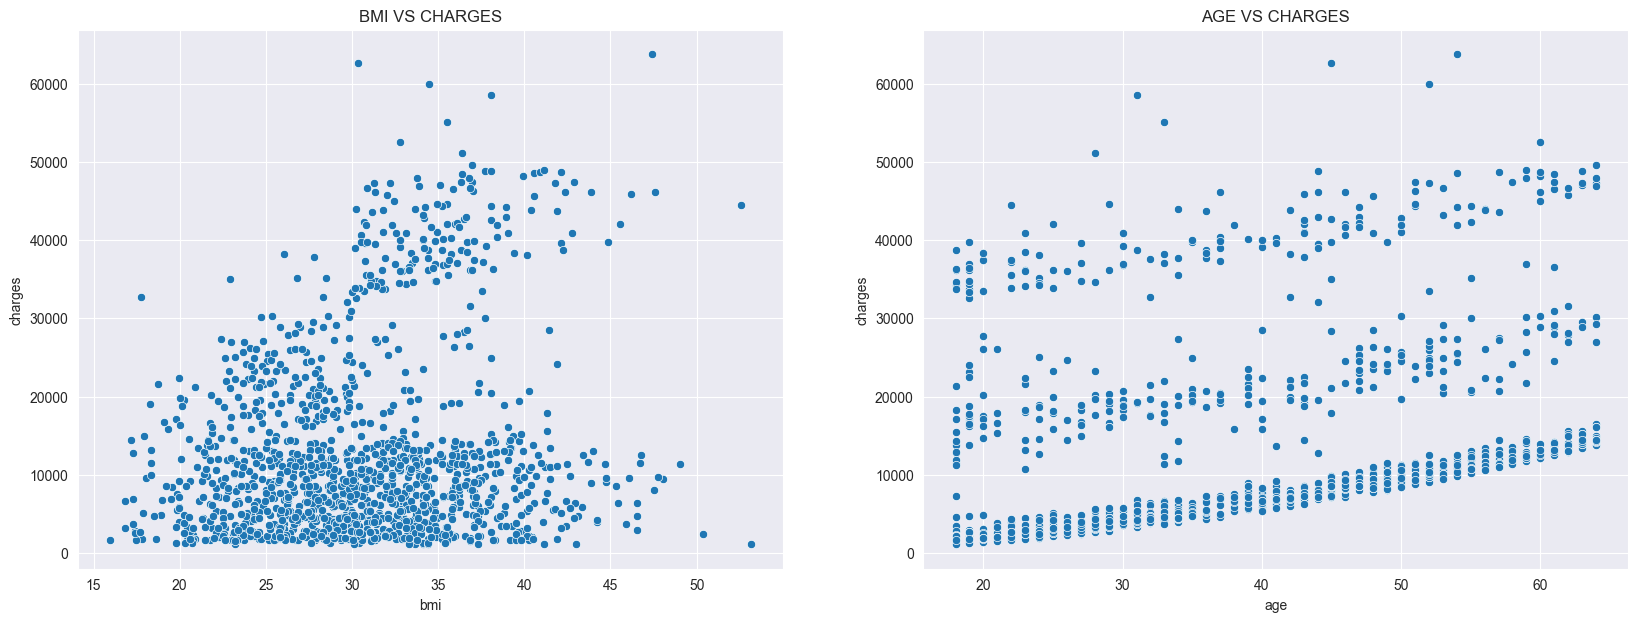

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
sns.scatterplot(data=insurance_df, x = 'bmi', y ='charges',ax=axes[0])
sns.scatterplot(data=insurance_df, x = 'age', y ='charges',ax=axes[1])

axes[0].set_title('BMI VS CHARGES')
axes[1].set_title('AGE VS CHARGES')

In [31]:
# test the relationship 

# set the hypothesis
ho = 'There is no relationship between bmi and charges'
h1 = 'There is a relationship between bmi and charges'

# set the level of significance
alpha = 0.05

# compute the test and obtain your p-value
coefficient_bmi, bmi_pvalue = stats.spearmanr(insurance_df['bmi'], insurance_df['charges'])

# decision rule
if bmi_pvalue < alpha:
    print(h1)
else:
    print(ho)

coefficient_bmi

There is a relationship between bmi and charges


0.11939590358331145

There is a weak positive relationship between bmi and charges at 0.119 signifying the lack of serious contribution from bmi to the overall charges of each customer

In [32]:
# test the relationship 

# set the hypothesis
ho = 'There is no relationship between age and charges'
h1 = 'There is a relationship between age and charges'

# set the level of significance
alpha = 0.05

# compute the test and obtain your p-value
age_coefficient, pvalue_age = stats.spearmanr(insurance_df['age'], insurance_df['charges'])

# decision rule
if pvalue_age < alpha:
    print(h1)
else:
    print(ho)

There is a relationship between age and charges


In [33]:
age_coefficient

0.5343921337718459

There is moderate positive correlation between age and charges.

<Axes: xlabel='region', ylabel='count'>

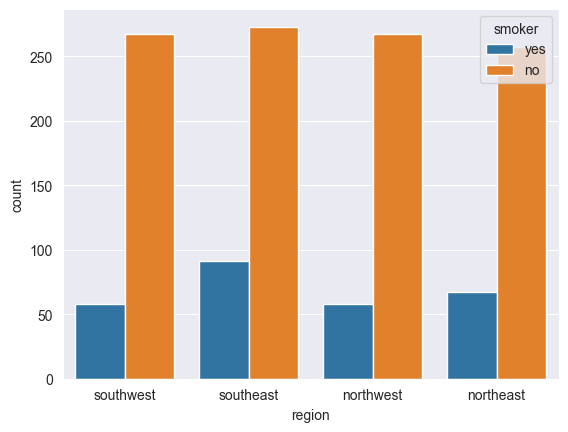

In [35]:
sns.countplot(data=insurance_df, x = 'region',hue='smoker')

In [36]:
insurance_df[['smoker','region']]

,smoker,region
0,yes,southwest
1,no,southeast
2,no,southeast
3,no,northwest
4,no,northwest
...,...,...
1333,no,northwest
1334,no,northeast
1335,no,southeast
1336,no,southwest


In [38]:
contingency_table = pd.crosstab(insurance_df['smoker'],insurance_df['region'])
contingency_table

region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


In [40]:
# test the relationship 

# set the hypothesis
ho = 'There is no assocition between smoking and region'
h1 = 'There is an assocition between smoking and region'

# set the level of significance
alpha = 0.05

# compute the test and obtain your p-value
chi_stats, chi_pvalue, dof, exp = stats.chi2_contingency(contingency_table)

# decision rule
if chi_pvalue < alpha:
    print(h1)
else:
    print(ho)

There is no assocition between smoking and region
